In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model

In [2]:
df = pd.read_csv('data/spam.csv', encoding='ISO-8859-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df.columns = ['labels','data']
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df['b_labels'] = df['labels'].map({'ham':0, 'spam':1})
Y = df['b_labels'].values

In [6]:
df_train, df_test, y_train, y_test = train_test_split(df['data'], Y, test_size=0.33)

In [7]:
#Convert sentences to sequences
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
seq_train = tokenizer.texts_to_sequences(df_train)
seq_test = tokenizer.texts_to_sequences(df_test)

In [8]:
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' %V)

Found 7290 unique tokens.


In [9]:
data_train = pad_sequences(seq_train)
print('Shape of train data', data_train.shape)
T = data_train.shape[1]

Shape of train data (3733, 189)


In [10]:
data_test = pad_sequences(seq_test, maxlen=T)
print('Shape of test data', data_test.shape)

Shape of test data (1839, 189)


In [11]:
# Create Model

#Crating Hyperparameters
#Embedding dimentionality
D = 20

#Note that size of embedding will be (V+1) x D, beacuse index start from 1 and 0 is not
#in word2idx as it is being used for padding
#Thus if final index is V then embedding layer must have size equal to V+1

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = Conv1D(32, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(64, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

In [12]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [13]:
r = model.fit(data_train, y_train, epochs=10, validation_data=(data_test, y_test))

Epoch 1/10
117/117 [==============================] - 4s 34ms/step - loss: 0.4078 - accuracy: 0.8594 - val_loss: 0.2618 - val_accuracy: 0.8793
Epoch 2/10
117/117 [==============================] - 2s 15ms/step - loss: 0.1388 - accuracy: 0.9392 - val_loss: 0.0688 - val_accuracy: 0.9826
Epoch 3/10
117/117 [==============================] - 2s 16ms/step - loss: 0.0174 - accuracy: 0.9952 - val_loss: 0.0636 - val_accuracy: 0.9853
Epoch 4/10
117/117 [==============================] - 2s 20ms/step - loss: 0.0049 - accuracy: 0.9992 - val_loss: 0.0617 - val_accuracy: 0.9859
Epoch 5/10
117/117 [==============================] - 2s 15ms/step - loss: 0.0024 - accuracy: 0.9997 - val_loss: 0.0717 - val_accuracy: 0.9848
Epoch 6/10
117/117 [==============================] - 2s 15ms/step - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.0747 - val_accuracy: 0.9848
Epoch 7/10
117/117 [==============================] - 2s 15ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0828 - val_accuracy: 0.9848

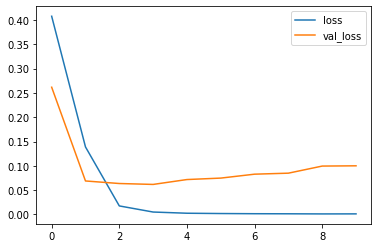

In [14]:
# Plot loss graph
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

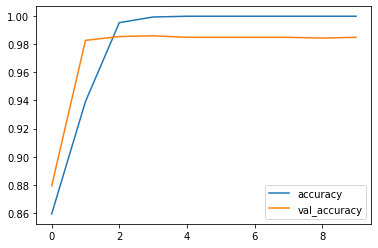

In [15]:
# Plot accuracy graph
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [16]:
p_test = model.predict(data_test).argmax(axis=1)

In [17]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
print('true ',y_test[i],'predicted ',p_test[i])
for idx in data_test[i]:
    if idx!=0:
        print(tokenizer.index_word[idx], end=' ')

true  1 predicted  0
from 88066 lost help 